<img src="imagem2.png" width=400 height=150>

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(101)
tf.set_random_seed(101)
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [3]:
#Placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [4]:
add_op = a+b
mul_op = a*b

In [7]:
#Sesions
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    mult_result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Rede Neural Simples

In [8]:
n_features = 10
n_dense_neurons = 3

In [9]:
x = tf.placeholder(tf.float32,(None,n_features))

In [10]:
#W = pesos, b = bias
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
#Conta a ser testada na regressão WX+b = z
xW = tf.matmul(x,W)

In [13]:
z = tf.add(xW,b)

In [14]:
#Função de ativação
a = tf.sigmoid(z)

In [16]:
#Inicializando as variáveis
init = tf.global_variables_initializer()

In [17]:
#rodando em uma sessão a rede neural simples
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [18]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


## Regressão Simples

In [21]:
#Nesse caso está rodando a rede em partes 

#Gerando a entrada e o label com ruidos
x_data = np.linspace(0,10,10)+ np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10)+ np.random.uniform(-1.5,1.5,10)

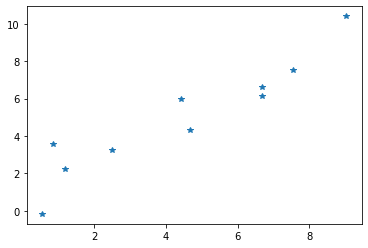

In [23]:
plt.plot(x_data,y_label,'*')

In [32]:
#Criando a rede neural para resolver a equação: y=mx+b
m = tf.Variable(0.45)
b = tf.Variable(0.32)

In [33]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2 #erro medio quadratico

In [34]:
optmizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optmizer.minimize(error)

In [35]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, finale_intercept = sess.run([m,b])

In [40]:
x_test = np.linspace(-1,11,10)
# y = mx+b
y_pred_plot = final_slope*x_test+finale_intercept

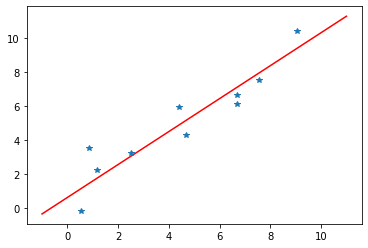

In [41]:
#Mostrando o resultado
plt.plot(x_test, y_pred_plot,'r')
plt.plot(x_data, y_label, '*')